In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd content/drive/MyDrive

[Errno 2] No such file or directory: 'content/drive/MyDrive'
/content


In [3]:
import numpy as np
import pandas as pd

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    
    # remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
    # tokenize text into words
    words = nltk.word_tokenize(text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # join words back into a string
    text = ' '.join(words)
    
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
df = pd.read_csv('/content/drive/MyDrive/train_data.csv')

In [6]:
df.describe()

,Unnamed: 0,label
count,16000.000000,16000.000000
mean,7999.500000,1.565937
std,4618.946489,1.501430
min,0.000000,0.000000
25%,3999.750000,0.000000
50%,7999.500000,1.000000
75%,11999.250000,3.000000
max,15999.000000,5.000000


In [7]:
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

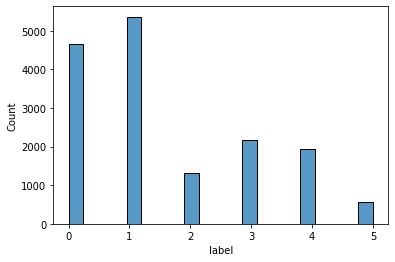

In [8]:
import seaborn as sns
sns.histplot(df['label'])

In [9]:
df['text'] = df['text'].apply(preprocess_text)

In [10]:
df

,Unnamed: 0,text,label
0,0,didnt feel humiliated,0
1,1,go feeling hopeless damned hopeful around some...,0
2,2,im grabbing minute post feel greedy wrong,3
3,3,ever feeling nostalgic fireplace know still pr...,2
4,4,feeling grouchy,3
...,...,...,...
15995,15995,brief time beanbag said anna feel like beaten,0
15996,15996,turning feel pathetic still waiting table subb...,0
15997,15997,feel strong good overall,1
15998,15998,feel like rude comment im glad,3


In [11]:
# 0 sadness, 1 joy , 2 love ,3 anger , 4 fear , 5 surprise 

In [12]:

# anger=np.where(df['label']==3)


In [13]:
# anger[0]
# df.iloc[anger[0]]

In [14]:
# from imblearn.over_sampling import ADASYN
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
y=df['label']

In [16]:
df.drop(['label'],axis=1,inplace=True)

In [17]:
df

,text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy
...,...
15995,brief time beanbag said anna feel like beaten
15996,turning feel pathetic still waiting table subb...
15997,feel strong good overall
15998,feel like rude comment im glad


In [18]:
import collections

In [19]:
df2=collections.Counter([y for x in df.values.flatten() for y in x.split()])

In [ ]:
# df2=pd.DataFrame(df2,index=np.arange(0,df.shape[0]))

In [20]:
print(df2,end=',')

Counter({'feel': 11506, 'feeling': 5455, 'like': 2918, 'im': 2430, 'time': 974, 'really': 942, 'know': 872, 'get': 778, 'make': 769, 'little': 736, 'want': 681, 'day': 675, 'thing': 672, 'people': 664, 'one': 647, 'would': 646, 'think': 609, 'life': 605, 'still': 596, 'ive': 587, 'even': 568, 'way': 528, 'bit': 521, 'something': 513, 'love': 512, 'much': 496, 'going': 489, 'dont': 482, 'could': 453, 'need': 442, 'go': 431, 'back': 406, 'good': 401, 'pretty': 392, 'say': 362, 'see': 359, 'always': 355, 'right': 353, 'work': 346, 'friend': 340, 'also': 337, 'year': 336, 'today': 332, 'around': 315, 'cant': 301, 'made': 296, 'help': 288, 'got': 278, 'well': 275, 'though': 274, 'didnt': 272, 'felt': 266, 'come': 265, 'lot': 264, 'never': 264, 'look': 264, 'thought': 262, 'someone': 259, 'every': 254, 'le': 248, 'happy': 245, 'enough': 238, 'quite': 238, 'week': 236, 'sure': 232, 'many': 232, 'find': 231, 'away': 226, 'kind': 225, 'home': 225, 'ever': 221, 'take': 220, 'anything': 219, 'per

In [21]:
df_bag=pd.DataFrame(df2,index=np.arange(0,df.shape[0]))

In [22]:
df_bag

,didnt,feel,humiliated,go,feeling,hopeless,damned,hopeful,around,someone,...,paste,pandora,cosmopolitian,monkees,tearing,irrelevant,braeden,calvin,beanbag,subbing
0,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
1,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
2,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
3,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
4,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
15996,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
15997,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1
15998,272,11506,50,431,5455,65,4,59,315,259,...,1,1,1,1,1,1,1,1,1,1


In [23]:
df_list=list(df['text'])

In [24]:
df_list[0]

'didnt feel humiliated'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer()
# matrix.fit(df_list)
# matrix.get_feature_names()
# X = matrix.fit_transform(df).toarray()
vector = matrix.fit_transform(df_list)
matrix.get_feature_names_out()
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
df_bow = pd.DataFrame(vector.toarray(),columns=matrix.get_feature_names_out())
pd.set_option('display.max_rows', None)
print(df_bow.head(10))

   aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron  ab  abandon  abandoned  \
0   0          0        0       0    0      0      0   0        0          0   
1   0          0        0       0    0      0      0   0        0          0   
2   0          0        0       0    0      0      0   0        0          0   
3   0          0        0       0    0      0      0   0        0          0   
4   0          0        0       0    0      0      0   0        0          0   
5   0          0        0       0    0      0      0   0        0          0   
6   0          0        0       0    0      0      0   0        0          0   
7   0          0        0       0    0      0      0   0        0          0   
8   0          0        0       0    0      0      0   0        0          0   
9   0          0        0       0    0      0      0   0        0          0   

   ...  zoned  zonisamide  zoo  zoom  zooming  zq  zucchini  zum  zumba  zz  
0  ...      0           0    0     0     

In [27]:
df_bow_Pd=pd.DataFrame(df_bow)

In [28]:
np.where(df_bow_Pd.iloc[0,:]==1)

(array([3189, 4362, 5687]),)

In [29]:
df_bow_Pd.iloc[1,:]

aa                                                                            0
aaaaaaand                                                                     0
aaaaand                                                                       0
aaaand                                                                        0
aac                                                                           0
aahhh                                                                         0
aaron                                                                         0
ab                                                                            0
abandon                                                                       0
abandoned                                                                     0
abandoning                                                                    0
abandonment                                                                   0
abated                                  

In [30]:
# ind=list(np.where(df_bow.iloc[1,:]==1))
# ind

In [31]:
# df_bow.columns[ind]

In [32]:
# df_bow.iloc[0,:]

In [33]:
pd.set_option('display.max_rows', None)
print(df_bow_Pd.head())


   aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron  ab  abandon  abandoned  \
0   0          0        0       0    0      0      0   0        0          0   
1   0          0        0       0    0      0      0   0        0          0   
2   0          0        0       0    0      0      0   0        0          0   
3   0          0        0       0    0      0      0   0        0          0   
4   0          0        0       0    0      0      0   0        0          0   

   ...  zoned  zonisamide  zoo  zoom  zooming  zq  zucchini  zum  zumba  zz  
0  ...      0           0    0     0        0   0         0    0      0   0  
1  ...      0           0    0     0        0   0         0    0      0   0  
2  ...      0           0    0     0        0   0         0    0      0   0  
3  ...      0           0    0     0        0   0         0    0      0   0  
4  ...      0           0    0     0        0   0         0    0      0   0  

[5 rows x 13456 columns]


In [35]:
df_bow_Pd.drop(df_bow_Pd.columns[[1,2,3,4,5,6]],axis=1,inplace=True)

In [36]:
df_bow_Pd.shape

(16000, 13444)

In [37]:
x=np.array(df_bow_Pd)

In [38]:
# x=np.array(df)

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.2)

In [41]:
X_train=np.array(np.uint8(X_train))
x_test=np.array(np.uint8(x_test))
y_train=np.array(np.uint8(y_train))
y_test=np.array(np.uint8(y_test))

In [42]:
print(type(X_train))

<class 'numpy.ndarray'>


In [43]:
print(type(x_test))

<class 'numpy.ndarray'>


In [44]:
print(type(y_test))

<class 'numpy.ndarray'>


In [45]:
import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [46]:
classifier = Sequential()

In [47]:
X_train.shape

(12800, 13444)

In [48]:
x_test.shape


(3200, 13444)

In [49]:

y_train.shape


(12800,)

In [50]:

y_test.shape

(3200,)

In [51]:
classifier.add(LSTM(256, input_shape=(X_train.shape), return_sequences=True))
classifier.add(Dropout(0.2))

In [52]:
classifier.add(LSTM(128))

In [53]:
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))



In [54]:
classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.2))

In [55]:
classifier.add(Dense(6, activation='softmax'))

In [56]:
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, decay=1e-6),
              metrics=['accuracy'] )

In [57]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12800, 256)        14029824  
                                                                 
 dropout (Dropout)           (None, 12800, 256)        0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [58]:
# X_train_new=X_train[np.newaxis,...].shape
# X_train_new

In [59]:
X_train_shape=np.reshape(X_train,(-1, 12800, 256)) 

ValueError: ignored

In [ ]:
classifier.fit(X_train,
         y_train,batch_size=2000,
          epochs=3,
          validation_data=(x_test, y_test))

Epoch 1/3


ValueError: ignored